# 1. Introducción

El dataset escogido es el [Student Performance Data Set](https://archive.ics.uci.edu/ml/datasets/Student+Performance), 
vale destacar que este dataset incluye las notas de matemáticas y portugués, pero en este caso solo tomaremos las notas de matemáticas, para no hacer el mismo análisis dos veces.

# Información del dataset. 

(Sección copiada desde el repositorio y traducida)

Estos datos muestran el logro estudiantil en la educación secundaria de dos escuelas portuguesas. Los atributos de los datos son acerca de las calificaciones de los estudiantes, características demográficas, sociales y relacionadas con la escuela, y fueron recolectadas usando cuestionarios y reportes escolares. 


Se proveen dos datasets relacionados con dos asignaturas distintas: Matemáticas (mat) y Portugués (Lenguaje)(por). En [Cortez y Silva, 2008], dos datasets fueron modelados clasificación binaria o de 5 niveles, y tareas de regresión. Nota importante: el atributo objetivo G3 tiene una fuerte correlación con los atributos G2 y G1. Esto ocurre porque G3 es la nota final del año (Emitida en el tercer periodo), mientras que G1 y G2 corresponden a las notas del primer y segundo periodo. Es mucho mas dificil predecir G3 sin G2 y G1, pero dicha predicción es mucho mas util (Ver informe para mas detalles).
## Información de los atributos:

## Ambos atributos sacados de student-mat.csv (Matemáticas) y student-por.csv (Portugués ):

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
2. sex - student's sex (binary: 'F' - female or 'M' - male) 
3. age - student's age (numeric: from 15 to 22) 
4. address - student's home address type (binary: 'U' - urban or 'R' - rural) 
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
16. schoolsup - extra educational support (binary: yes or no) 
17. famsup - family educational support (binary: yes or no) 
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
19. activities - extra-curricular activities (binary: yes or no) 
20. nursery - attended nursery school (binary: yes or no) 
21. higher - wants to take higher education (binary: yes or no) 
22. internet - Internet access at home (binary: yes or no) 
23. romantic - with a romantic relationship (binary: yes or no) 
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
29. health - current health status (numeric: from 1 - very bad to 5 - very good) 
30. absences - number of school absences (numeric: from 0 to 93) 

## Notas relacionadas con cada asignatura en específico, matemáticas o portugués: 

31. G1 - first period grade (numeric: from 0 to 20) 
31. G2 - second period grade (numeric: from 0 to 20) 
32. G3 - final grade (numeric: from 0 to 20, output target)



In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import seaborn as sns
from IPython.display import display, Markdown
plt.style.use('fivethirtyeight')
FIGSIZE=(12, 8)
%matplotlib inline

# para mostrar la información dentro del notebook más bonito.
def pretty_print(text):
    return display(Markdown(text))

In [75]:
df = pd.read_csv('data/student-mat.csv', sep=';')

display(df.head())
pretty_print("**Columnas**: %s" % ", ".join(df.columns))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


**Columnas**: school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3

# 2. Desarrollo

## 2.1.  Estudio de estadística descriptiva de dos variables

In [76]:
general_correlation = df.corr()
display(general_correlation)
# para no imprimir la doble relación
already_printed = set()

pretty_print("### Máxima correlación por variable")
final_output = "|Var1|Var2|Corr|\n"
final_output += "|:--:|:--:|:--:|\n"
for current, row in general_correlation.iterrows():
    max_correlation_i = row[row.index != current].idxmax()
    
    if (current, max_correlation_i) not in already_printed:
        final_output += "|%s|%s|%f|\n" % (current, max_correlation_i, row[max_correlation_i])
        
    already_printed.add((current, max_correlation_i))
    already_printed.add((current, max_correlation_i)[::-1])
pretty_print(final_output)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


### Máxima correlación por variable

|Var1|Var2|Corr|
|:--:|:--:|:--:|
|age|failures|0.243665|
|Medu|Fedu|0.623455|
|traveltime|Dalc|0.138325|
|studytime|G1|0.160612|
|famrel|freetime|0.150701|
|freetime|goout|0.285019|
|goout|Walc|0.420386|
|Dalc|Walc|0.647544|
|health|famrel|0.094056|
|absences|age|0.175230|
|G1|G2|0.852118|
|G2|G3|0.904868|


Se puede apreciar que existe una correlación muy alta entre `(G1, G2)` y `(G2, G3)`, pero estas se omitirán ya que son objetivo del **target**.
Una correlación no menor se aprecia entre Medu y Fedu, que son la educación de la madre y del padre, respectivamente, números que varían desde el 0 al 4, mientras mayor sea la educación. Tiene sentido que los padres de los alumnos tengan un nivel de educción similar.
También se aprecia una correlacion notable entre Dalc y Walc, que corresponden a la tasa de consumo de alcohol durante la semana, y durante el fín de semana. Tiene sentido que estén relacionadas ya que alguien que consume alcohol durante la semana suele hacerlo también durante el fin de semana.
Nos gustaría conocer si existe alguna relación entre el <span style='color:blue'>"studytime"</span> y el <span style='color:blue'>"G3"</span>(Nota final), por eso escogeremos estas 2 variables. 

In [77]:
final_grade = df['G3']
description_final_grade = final_grade.describe()
description_final_grade['kurtosis'] = final_grade.kurtosis()
description_final_grade['skew'] = final_grade.skew()
description_final_grade['max'] = final_grade.max()

studytime = df['studytime']
description_studytime = studytime.describe()
description_studytime['kurtosis'] = studytime.kurtosis()
description_studytime['skew'] = studytime.kurtosis()
description_studytime['max'] = studytime.max()

## formato general de la muestra de datos
text_format = """
### {title}
**Cantidad de datos**: {count: .0f}  
**Promedio**: {mean: .2f}  
**Desviación Estándar**: {std: .2f}  
**Mínimo**: {min: .0f}  
**Máximo**: {max: .0f}  
**25%**: {25%: .0f}  
**50%**: {50%: .0f}  
**75%**: {75%: .0f}  
**Sesgo**: {skew: .5f}  
**Kurtosis**: {kurtosis: .5f}  
"""


In [78]:
pretty_print(text_format.format(**description_final_grade, title="Análisis descriptivo: Nota final"))


### Análisis descriptivo: Nota final
**Cantidad de datos**:  395  
**Promedio**:  10.42  
**Desviación Estándar**:  4.58  
**Mínimo**:  0  
**Máximo**:  20  
**25%**:  8  
**50%**:  11  
**75%**:  14  
**Sesgo**: -0.73267  
**Kurtosis**:  0.40342  


Es interesante notar que el promedio se encuentra muy cercano al centro de los datos, y que $Q_3$ siga cercano, lo que podría dar una sensación de centralización en 10.

In [79]:
pretty_print(text_format.format(**description_studytime, title="Análisis descriptivo: Tiempo de estudio"))


### Análisis descriptivo: Tiempo de estudio
**Cantidad de datos**:  395  
**Promedio**:  2.04  
**Desviación Estándar**:  0.84  
**Mínimo**:  1  
**Máximo**:  4  
**25%**:  1  
**50%**:  2  
**75%**:  2  
**Sesgo**: -0.01443  
**Kurtosis**: -0.01443  


En la descripción del dataset, se puede notar que la encuesta consideraba desde 1 hora hasta las 10 horas, sin embargo, la mayor parte del estudiantado **no superaba las dos horas** ($\overline{X} \approx 2$ y el tercer quintil es 2)

## 2.2 Visualización de cada variable

A continuación se generarán 3 gráficos descriptivos por cada variable seleccionada. Estos gráficos serán:

* Histograma
* Histograma de frecuencia acumulada (Ojiva)
* Box plot

### 2.2.1 Nota final

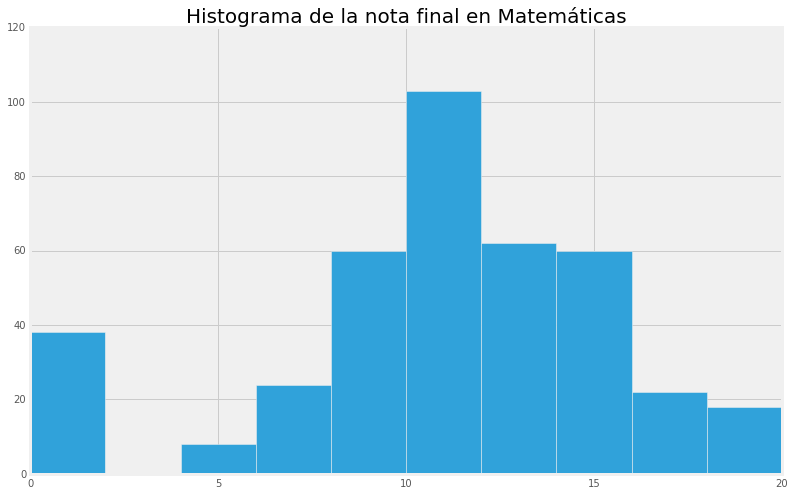

In [80]:
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111)
final_grade.hist(ax=ax)
ax.set_title("Histograma de la nota final en Matemáticas", fontsize=20)
plt.show()

Se puede apreciar una distribución normal, exceptuando los valores cercanos a 0. Estos valores cercanos al cero no son pocos, y no concuerdan con la distribución que parecen seguir el resto de valores. Se podría pensar que se trata de alumnos que por diversas razones dejaron el ramo de lado, abandonado, y no intentaron aprobarlo. Por lo que los datos estarían separados entre los alumnos que si intentaron pasar el ramo, los cuales cáen dentro de la distribución normal, y los que no lo intentaron. 

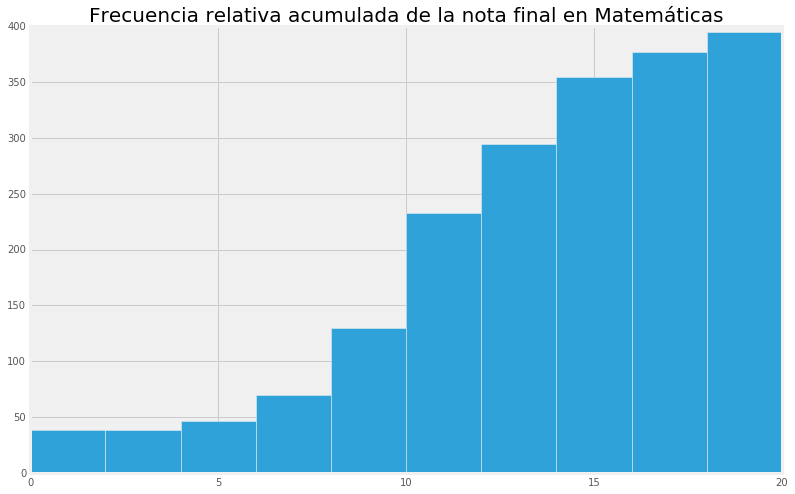

In [81]:
# Frecuencia relativa acumulada
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111)
ax.set_title("Frecuencia relativa acumulada de la nota final en Matemáticas", fontsize=20)
final_grade.hist(cumulative = True) # Frecuencia relativa acumulada
plt.show()

Se aprecia que este grafico de frecuencia acumulada es muy similar al de una distribución normal, solo que se parte desde un valor inicial distinto de 0, debido a los valores que no concuerdan con la distribución normal cercanos al 0. 

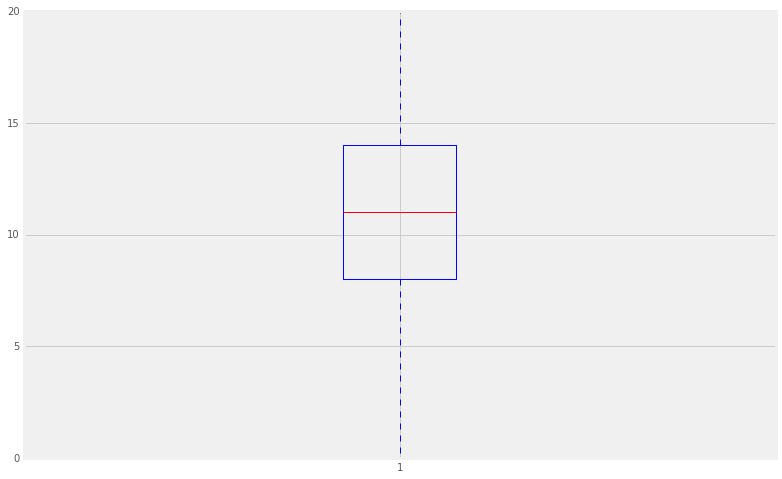

In [82]:
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111)
ax.boxplot(final_grade)
plt.show()

Se aprecia como el bloxplot tiene sentido, ya que el sistema de notas de dicha institución va desde 0 a 20. Los valores extraños cercanos a 0 no pasan a ser outliers ya que se encuentran dentro de el rango esperado.

### 2.2.2 Tiempo de estudio

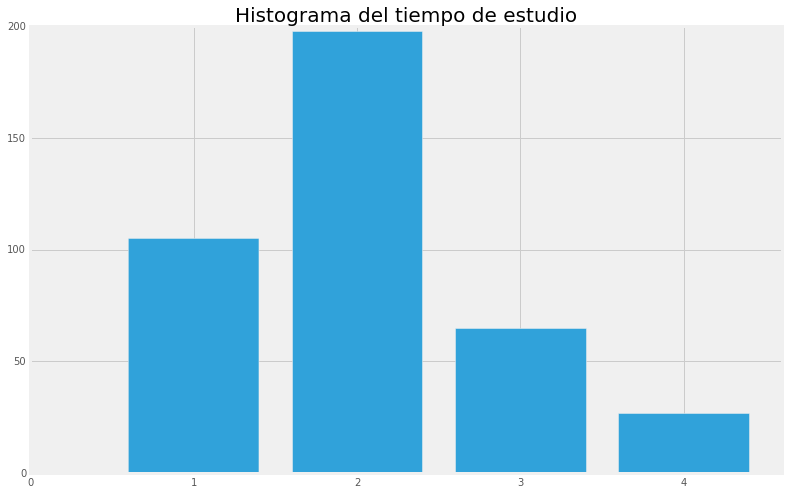

In [83]:
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111)
studytime.hist(ax=ax, bins=np.arange(studytime.min()-1, studytime.max()+1) + 0.5, width=0.8)
ax.set_xticks(np.arange(0, 5) -0.1)
ax.set_xticklabels(range(0, 5))
ax.set_title("Histograma del tiempo de estudio", fontsize=20)
plt.show()

El histograma nos muestra que las horas de estudio solo toman 4 valores. Se aprecia como la tendencia es estudiar 2 horas, y hacia los lados decae. No se puede hablar de una distribución por la poca cantidad de valores posibles que se tienen.

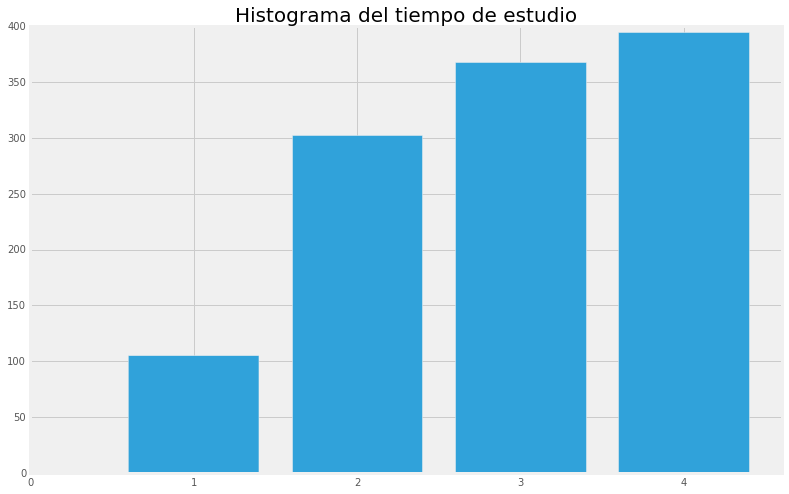

In [84]:
# Frecuencia relativa acumulada
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111)
studytime.hist(ax=ax, bins=np.arange(studytime.min()-1, studytime.max()+1) + 0.5, width=0.8, cumulative = True)
ax.set_xticks(np.arange(0, 5) -0.1)
ax.set_xticklabels(range(0, 5))
ax.set_title("Histograma del tiempo de estudio", fontsize=20)
plt.show()

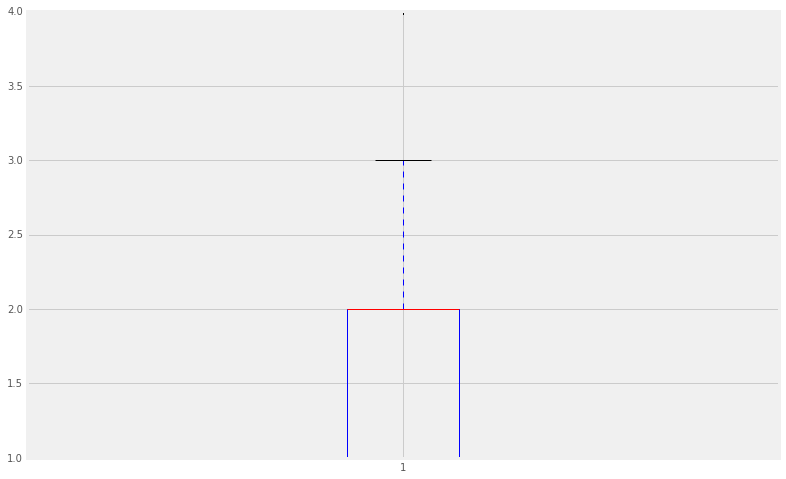

In [85]:
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111)
ax.boxplot(studytime)
plt.show()

Este boxplot pierde un poco el sentido por lo mencionado anteriormente, la poca cantidad de valores posibles que toma esta variable. 

## Relacionando las variables
A pesar de que se ha visto que no existe un índice de correlación muy alto entre `G3` y `studytime`, se continuará a hacer un boxplot para tener una noción de _orden_ entre las dos variables.

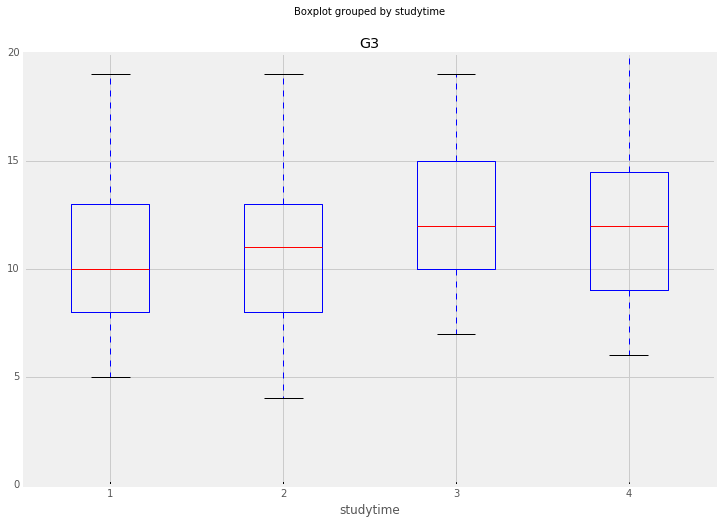

In [86]:
fig, ax = plt.subplots(figsize=FIGSIZE)
df.boxplot(column='G3', by='studytime', ax=ax)
plt.show()

Se puede notar una pequeña separación entre las 2 y las 3 horas de estudio respecto a la nota final, pero entre las 3 y las 4 horas de estudio no hay diferencias significativas. Entre 1 hora de estudios, y 2 horas de estudio, se aprecia un pequeño crecimiento en la media. Se aprecia como la media aumenta, muy poco, mientras mas horas de estudio se tienen. Se cumple con la lógica de que al estudiar mas, el promedio debería permanecer igual o mayor, pero no disminuir. Un detalle que se aprecia es que el valor de la nota máxima se encuentra dentro de las 4 horas de estudio. 

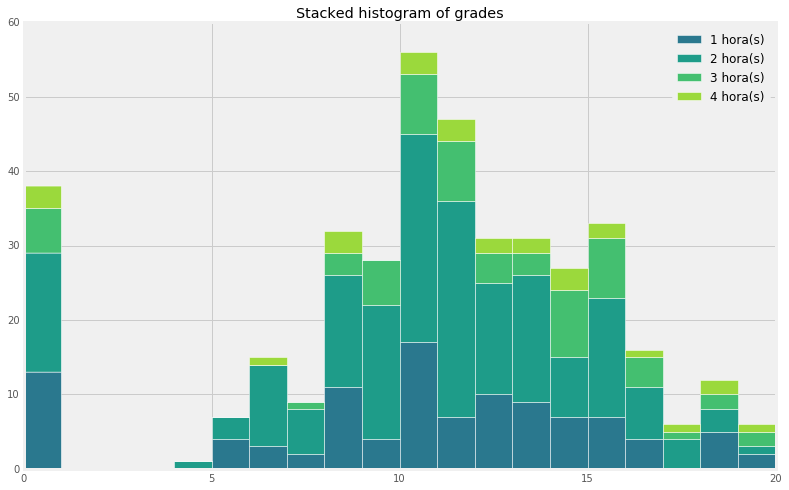

In [87]:
#colors
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0.4, 1, 5)]

fig, ax = plt.subplots(figsize=FIGSIZE)
bottom = np.zeros(len(np.arange(-0.5, 20))-1)
_grouped = df.groupby('studytime')
for i, key in _grouped:
    last_plot = ax.hist(key['G3'], color=colors[i-1], 
                        bins=np.arange(-0.5, 20) + 0.5, bottom=bottom, label="%d hora(s)" % i, edgecolor='white')
    bottom += np.array(last_plot[0])
    #df.groupby("studytime")['G3'].hist(bins=np.arange(-0.5, 20) + 0.5, alpha=0.7, color=colors)
plt.title("Stacked histogram of grades")
plt.legend()
plt.show()

Pareciera que para todas las horas de estudio se sigue una distribución normal bastante similar, por lo que no se pueden notar grandes diferencias entre estudiar 1 o 4 horas. Nuevamente se tienen los valores que no siguen la distribución cerca del 0, cuya posible explicación se dio anteriormente.

## 2.3 Análisis por Target

El target del dataset es intentar predecir la gente que reprobará antes de que lo haga, con el fin de atacar el problema antes de que ocurra. `G1` y `G2` corresponden a notas de los *semestres*, y `G3` a la nota final.

En Portugal, lugar donde se recolectó la data, la escala de notas es como la siguiente:

|         Rango         | Calificación |
| :-------------------: | :----------: |
|  $~20\\~~\vdots\\17.5$  |  Excelente   |
| $17.4\\~~\vdots\\15.5$ |   Muy bien   |
| $15.4\\~~\vdots\\13.5$ |     Bien     |
| $13.4\\~~\vdots\\~9.5$  |  Suficiente  |
|  $9.4\\~~\vdots\\~3.5$  | Insuficiente |
|   $3.4\\~~\vdots\\~~0$   |     Mal      |

Por lo tanto, para determinar si alguien aprueba o no, se tiene que cumplir que

$$ G3 \geq 9.5 $$

Separaremos los datos en dos grupos, aprobados y no aprobados, y repetiremos los estudios anteriores sobre G3 y studytime.

<span style = "color:red"> Observación: </span> Se presiente que separar las notas de acuerdo a G3, y luego analizar cambios en la varialbe G3 no tendrá mucho sentido. Si podría llevarnos a resultados interesantes el estudio sobre studytime.

In [88]:
df_repro = df.copy()[df["G3"]<9.5]
df_repro.index = range(0, len(df_repro))
df_apro = df.copy()[df["G3"]>= 9.5]
df_apro.index = range(0, len(df_apro))

n = len(df)
n_apro = len(df_apro)
n_repro = len(df_repro)
prob_apro = n_apro/n
prob_repro = n_repro/n

print(""" Aprobaron un total de %d alumnos (%% %.1f)""" %(n_apro, prob_apro*100)) 
print(""" Reprobaron un total de %d alumnos (%% %.1f)""" %(n_repro, prob_repro*100)) 

 Aprobaron un total de 265 alumnos (% 67.1)
 Reprobaron un total de 130 alumnos (% 32.9)


### 2.3.1 Alumnos aprobados.

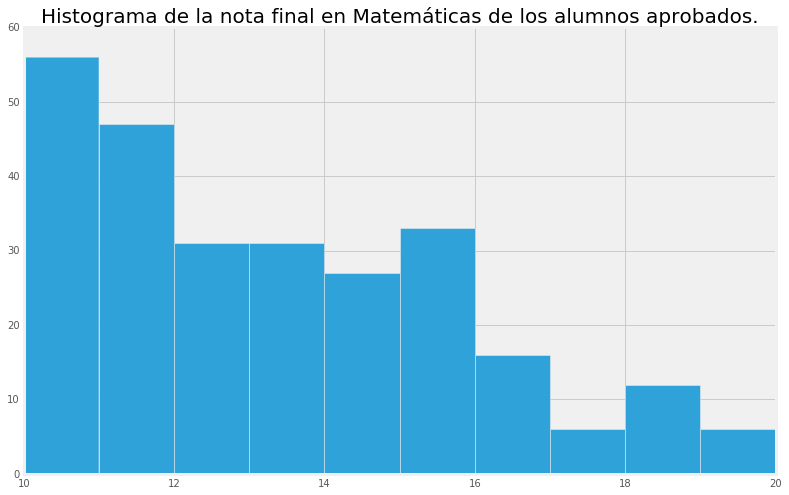

In [89]:
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111)
df_apro["G3"].hist(ax=ax)
ax.set_title("Histograma de la nota final en Matemáticas de los alumnos aprobados.", fontsize=20)
plt.show()

Se aprecia que la nota de los alumnos que aprobaron estan concentrados cerca de la nota divisoria entre aprobados y reprobados. Aparte de eso este histograma no nos dice mucho, es simplemente la mitad derecha del histograma de las notas finales de matemáticas, que parecía tener una distribución normal.

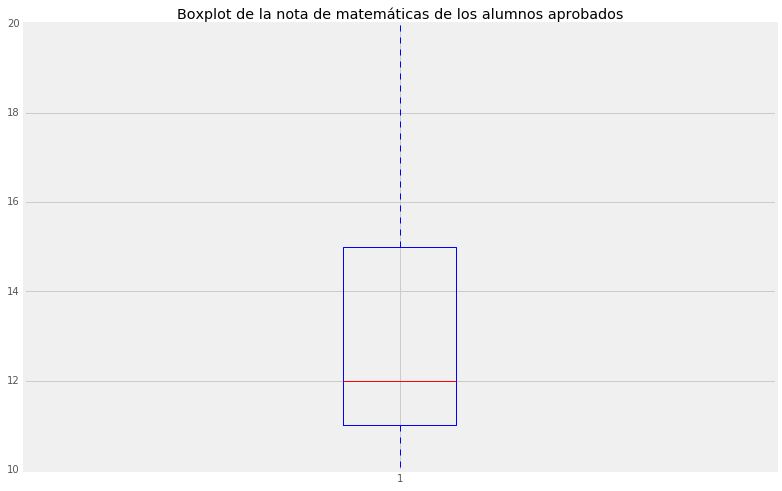

In [90]:
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111)
ax.boxplot(df_apro["G3"])
ax.set_title('Boxplot de la nota de matemáticas de los alumnos aprobados')
plt.show()

No nos dice mucho, solo que la nota de los alumnos aprobados esta concentrada cerca de la nota limite entre reprobados y aprobados.

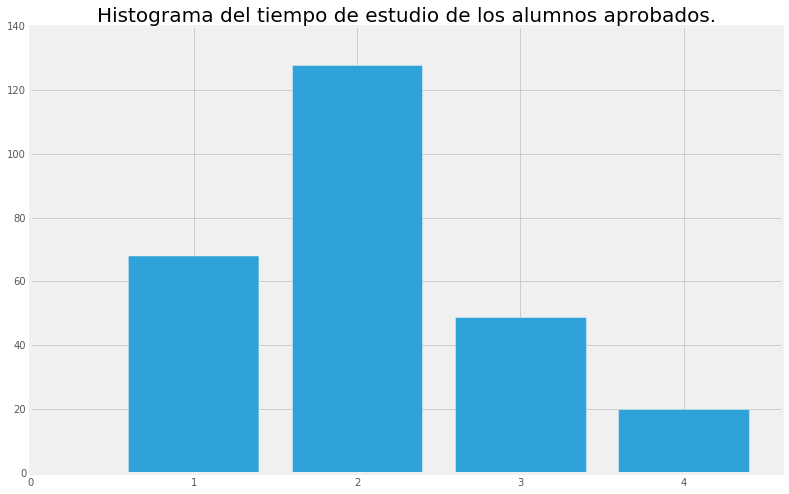

In [91]:
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111)
df_apro["studytime"].hist(ax=ax, bins=np.arange(studytime.min()-1, studytime.max()+1) + 0.5, width=0.8)
ax.set_xticks(np.arange(0, 5) -0.1)
ax.set_xticklabels(range(0, 5))
ax.set_title("Histograma del tiempo de estudio de los alumnos aprobados.", fontsize=20)
plt.show()

El histograma de la hora de estudio de los alumnos aprobados parece comportarse de igual manera que el de los alumnos en general.

### 2.3.2 Alumnos reprobados

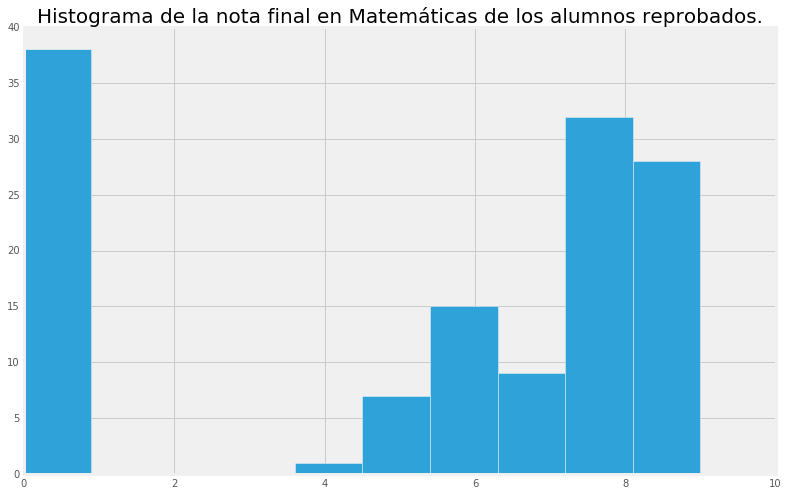

In [92]:
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111)
df_repro["G3"].hist(ax=ax)
ax.set_title("Histograma de la nota final en Matemáticas de los alumnos reprobados.", fontsize=20)
plt.show()

Igual que con los aprobados, este histograma solo nos muestra el lado izquierdo del histograma de las notas de todos los alumnos. 

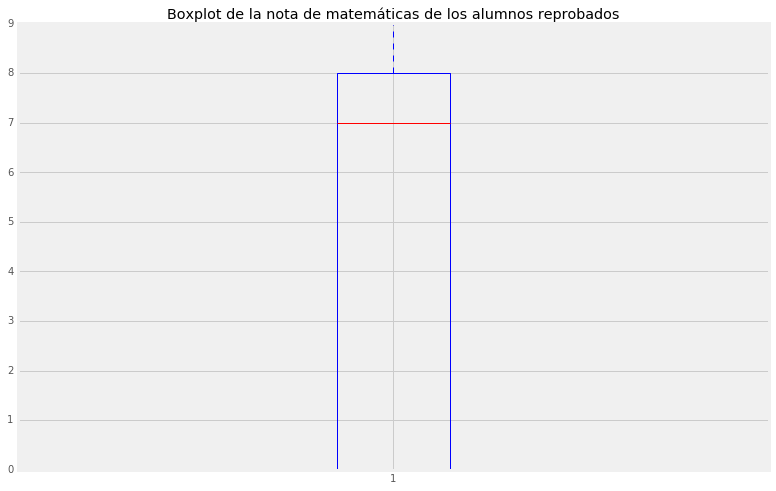

In [93]:
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111)
ax.boxplot(df_repro["G3"])
ax.set_title('Boxplot de la nota de matemáticas de los alumnos reprobados')
plt.show()

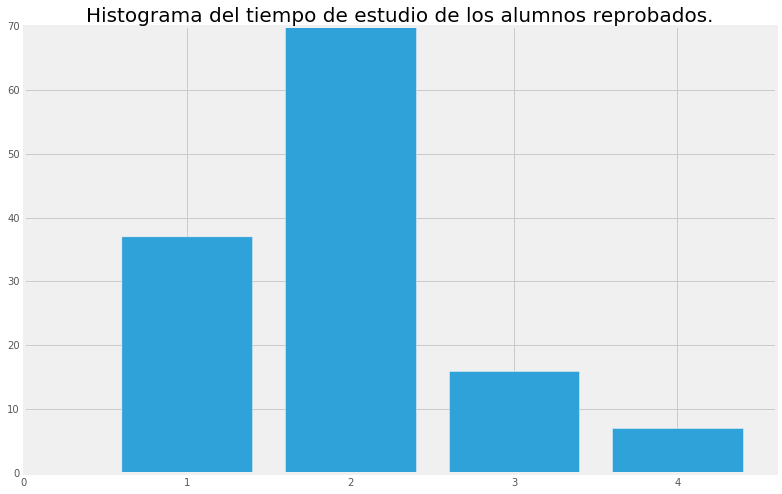

In [94]:
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111)
df_repro["studytime"].hist(ax=ax, bins=np.arange(studytime.min()-1, studytime.max()+1) + 0.5, width=0.8)
ax.set_xticks(np.arange(0, 5) -0.1)
ax.set_xticklabels(range(0, 5))
ax.set_title("Histograma del tiempo de estudio de los alumnos reprobados.", fontsize=20)
plt.show()

El histograma de la hora de estudio de los alumnos reprobados parece comportarse de igual manera que el de los alumnos en general. Al menos en este gráfico.

### 2.3.3 Comparación del tiempo de estudio entre alumnos aprobados y reprobados.

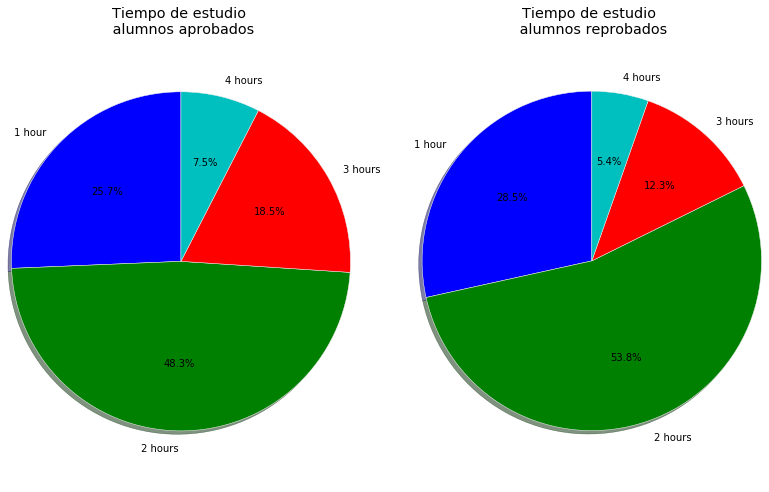

In [103]:
fig = plt.figure(figsize=FIGSIZE)



################# Alumnos aprobados

ax1 = fig.add_subplot(121)

labels = '1 hour', '2 hours', '3 hours', '4 hours'
sizes = [len(df_apro[df_apro['studytime'] == 1])/n_apro, len(df_apro[df_apro['studytime'] == 2])/n_apro,
         len(df_apro[df_apro['studytime'] == 3])/n_apro, len(df_apro[df_apro['studytime'] == 4])/n_apro]
explode = (0, 0, 0, 0)

ax1.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Tiempo de estudio \n alumnos aprobados")

################# Alumnos reprobados

ax2 = fig.add_subplot(122)

labels = '1 hour', '2 hours', '3 hours', '4 hours'
sizes = [len(df_repro[df_repro['studytime'] == 1])/n_repro, len(df_repro[df_repro['studytime'] == 2])/n_repro,
         len(df_repro[df_repro['studytime'] == 3])/n_repro, len(df_repro[df_repro['studytime'] == 4])/n_repro]
explode = (0, 0, 0, 0)

ax2.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Tiempo de estudio \n alumnos reprobados")

plt.show()


Apreciamos como los alumnos aprobados efectivamente estudiaron mas que los reprobados. No es una diferencia tan abrumadora pero es notoria. El porcentaje de alumnos que estudiaron 3 y 4 horas es mayor dentro de los alumnos aprobados, mientras que el porcentaje de alumnos que estudiaron 1 y 2 horas es mayor dentro de los alumnos reprobados.

## Conclusiones

Se generaron los atributos descriptivos principales para cada variable del dataset del ramo de matemáticas. Se pudo observar correlaciones interesantes entre al menos 3 pares de variables, y luego se eligieron como foco de estudio las variables G3 y studytime, debido a que se presumía una relación interesante entre ambas variables. Se hicieron 3 tipos de gráficos sobre cada variable. Se vio un comportamiento normal en la variable de las notas de matemática. Si bien se pudo apreciar un sutil aumento de la nota final en relación con las horas de estudio, no hizo una diferencia abrupta como se esperaba. Al separar el estudio segun el target(G3), entre alumnos aprobados y reprobados, no se pudo apreciar nada muy interesante al sacar los mismos gráficos anteriores en los nuevos conjuntos de datos, al menos con las variables que nosotros elegimos estudiar. Lo mas interesante apreciar que los alumnos que aprobaron efectivamente estudiaron mas que los reprobados. La diferencia entre las horas de estudio de ambos sets no fue muy grande pero si es facilmente apreciable.